<a href="https://colab.research.google.com/github/lakshiyasrp/projects/blob/main/Image_to_Image_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE TO IMAGE TRANSLATION**

This project is a manual simulation of the Pix2Pix effect, which is typically achieved using deep learning.

**INSTALL LIBRARIES**

In [ ]:
!pip install tensorflow matplotlib numpy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import cv2

**LOAD Pix2Pix_Effect**

In [ ]:
def manual_pix2pix_effect(input_image):

    # Convert to numpy array
    img_array = np.array(input_image)
    # Edge detection (simulates sketch-to-image)
    if len(img_array.shape) == 3:  # Color image
        gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    else:  # Already grayscale
        gray = img_array

    edges = cv2.Canny(gray, 50, 150)

    # Colorize based on edges (simple simulation)
    colored = np.zeros((*edges.shape, 3), dtype=np.uint8) # Changed to uint8
    colored[edges > 0] = [255, 200, 100]  #Edges color (orange-ish)
    colored[edges == 0] = [50, 50, 150]   # Background color (blue-ish)

    # Blend with original for more realistic effect
    if len(img_array.shape) == 3:
        blended = cv2.addWeighted(img_array, 0.7, colored, 0.3, 0)
    else:
        colored_gray = cv2.cvtColor(colored, cv2.COLOR_RGB2GRAY)
        blended = cv2.addWeighted(np.stack([gray]*3, axis=-1), 0.7, colored, 0.3, 0)

    return Image.fromarray(blended.astype('uint8'))

**UPLOAD IMAGE**

In [ ]:
print("🖼️ Upload your image (PNG/JPG):")
uploaded = files.upload()
img_path = next(iter(uploaded))
original_img = Image.open(img_path)


🖼️ Upload your image (PNG/JPG):


Saving img.jpeg to img.jpeg


**PROCESS THE IMAGE**

In [ ]:
print("🎨 Applying effect...")
result_img = manual_pix2pix_effect(original_img)


🎨 Applying effect...


**DISPLAY RESULT**

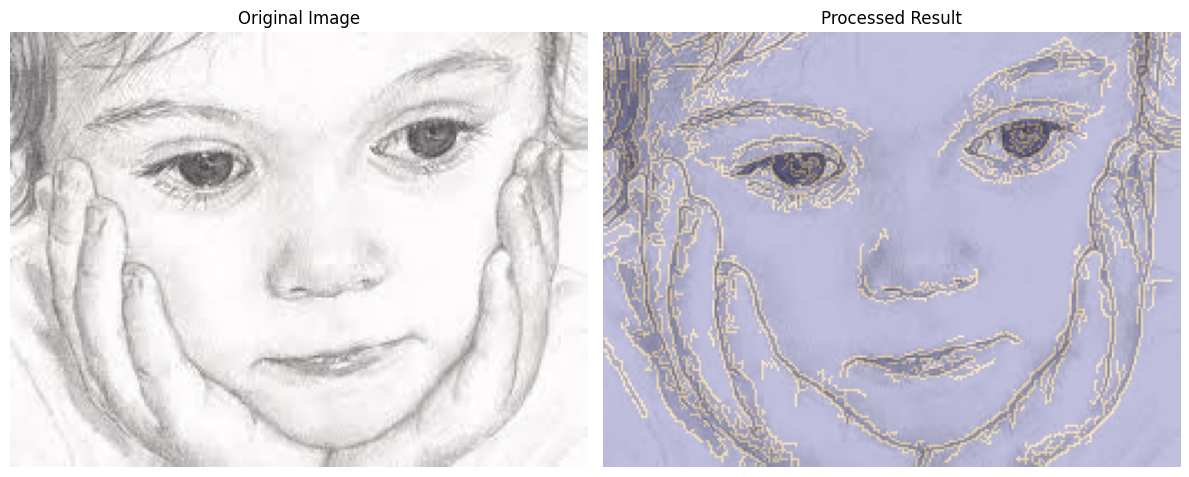

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image", fontsize=12)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_img)
plt.title("Processed Result", fontsize=12)
plt.axis("off")

plt.tight_layout()
plt.show()

**EXPLANATION OF THE PROJECT**

Pix2Pix is a deep learning model based on Generative Adversarial Networks (GANs), designed for image-to-image translation tasks. It was introduced by Isola et al. (2017) in the paper "Image-to-Image Translation with Conditional Adversarial Networks". The model is capable of learning a mapping between two image domains and generating realistic output images from corresponding input images.

**1.Install & Import Dependencies**

Imports essential Python libraries for:

NumPy (array operations)

Matplotlib (for visualization)

PIL (Pillow) (image handling)

Google Colab's files module (for file uploads)

OpenCV (cv2) (for image processing)

**2.Function: manual_pix2pix_effect(input_image):**

This function takes an input image and applies a transformation to simulate the Pix2Pix effect.

**Step 1: Convert the Image to a NumPy Array:**

The input image is converted into a NumPy array for easier processing.

If the image has 3 color channels (RGB), it is converted to grayscale using OpenCV.

If it's already grayscale, it remains unchanged.

**Step 3: Apply Edge Detection (Canny):**

Canny edge detection is used to detect outlines in the image.

It works by detecting areas of high contrast (borders).

**Step 4: Create a Colored Effect:**

A blank (black) image is created with the same size as the detected edges.

Edges are colored orange ([255, 200, 100]).

Background is colored blue ([50, 50, 150]).

**Step 5: Blend the Colors with the Original Image:**

The original image is combined with the colored edges using weighted blending.

If the image is RGB, it blends the original with the colored effect.

If the image is grayscale, it converts the effect to grayscale before blending.

**Step 6: Convert Back to Image:**

The final transformed image is returned as a PIL image.


**3. User Uploads an Image:**

The user is prompted to upload an image.

The image is opened using PIL (Pillow).



**4.Apply the Manual Pix2Pix Effect:**

The function is called, and the uploaded image is processed.

**5. Display the Original & Transformed Images**:

Uses Matplotlib to display both:

Original Image

Transformed Image

The images are shown side by side.


**What is This Project Doing?**

Simulating a Pix2Pix model (which usually requires deep learning) using classical image processing.

Using Canny edge detection to create a sketch effect.

Applying custom colorization for a creative transformation.

Blending the processed effect with the original image for realism.



**Possible Improvements**

Use a Neural Network (like Pix2Pix GAN) instead of edge detection for a more authentic transformation.

Allow user control over the edge detection parameters (50, 150).

Provide more colorization styles (e.g., cartoon, sketch, painting effects).

Add a UI with sliders to tweak the effects in real-time.